In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_match1 = pd.read_csv('/content/drive/MyDrive/Sem3/DS203/Project/IPL Matches 2008-2020.csv')
df_match1.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
df_balls = pd.read_csv('/content/drive/MyDrive/Sem3/DS203/Project/IPL Ball-by-Ball 2008-2020.csv')
df_balls.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
df = pd.merge(left = df_match1, right = df_balls, on='id', how = 'right')
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
df_match1 = df_match1.replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
df_match1.loc[df_match1['city'].isnull(), 'city'] = df_match1[df_match1['city'].isnull()]['venue'].apply(lambda x: x.split()[0]) # Dubai and Sharjah filled
df_match1 = df_match1[df_match1['winner'].notnull()] # drop rows with unavailable output
df_match1['result_margin'] = df_match1['result_margin'].fillna(0) # set result_margin of ties to 0
df_match1['date'] = pd.to_datetime(df_match1['date'], format='%Y-%m-%d')
df_match1 = df_match1.sort_values(by='date')

In [ ]:
Quality=pd.DataFrame((df_match1['winner'].value_counts())/(df_match1['team1'].value_counts()+df_match1['team2'].value_counts())*100)
Quality.reset_index(inplace=True)
Quality.columns=['team1','Quality1']

In [ ]:
df_match2 = pd.merge(left = df_match1, right = Quality, on='team1', how = 'right')

In [ ]:
Quality=pd.DataFrame((df_match1['winner'].value_counts())/(df_match1['team1'].value_counts()+df_match1['team2'].value_counts())*100)
Quality.reset_index(inplace=True)
Quality.columns=['team2','Quality2']

In [ ]:
df_match = pd.merge(left = df_match2, right = Quality, on='team2', how = 'right')

In [ ]:
df_match = df_match.sort_values(by='date')
df_match=df_match.reset_index(drop=True)
df_match

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Quality1,Quality2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,47.395833,51.562500
1,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,42.138365,50.943396
2,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,46.315789,59.550562
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,59.113300,47.395833
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,51.562500,38.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,1216495,Sharjah,2020-11-03,S Nadeem,Sharjah Cricket Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,10.0,N,NaN,C Shamshuddin,RK Illingworth,59.113300,53.225806
808,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,59.113300,57.575758
809,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,47.395833,53.225806
810,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,57.575758,53.225806


In [ ]:
encoder= LabelEncoder()

In [ ]:
variables = pd.DataFrame()
#variables['city'] = encoder.fit_transform(df_match['city'])
#variables['year'] = df_match['date'].dt.year
#variables['day_of_year'] = df_match['date'].dt.dayofyear
variables['venue'] = encoder.fit_transform(df_match['venue'])
#variables['neutral_venue'] = df_match['neutral_venue']
variables['team1'] = encoder.fit_transform(df_match['team1'])
variables['team2'] = encoder.fit_transform(df_match['team2'])
variables['toss_team1'] = (df_match['team1']==df_match['toss_winner']).astype(int)
variables['toss_bat'] = (df_match['toss_decision']=='bat').astype(int)
#variables['eliminator'] = (df_match['eliminator']=='Y').astype(int)
variables['method'] = (df_match['method']=='D/L').astype(int)
#variables['umpire1'] = encoder.fit_transform(df_match['umpire1'])
#variables['umpire2'] = encoder.fit_transform(df_match['umpire2'])
variables['Quality1'] = df_match['Quality1']
variables['Quality2'] = df_match['Quality2']
variables['win_team1'] = (df_match['team1']==df_match['winner']).astype(int) # to be changed
variables = variables.dropna()

In [ ]:
X1, y = variables.iloc[:, :-1], variables['win_team1']
mms = preprocessing.MinMaxScaler()
X=mms.fit_transform(X1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1, shuffle=False)

In [ ]:
val_s=[]
test_s=[]
f1_s=[]

Validation Score =  0.680327868852459
Test Score =  0.6065573770491803
f1 Score =  0.6923076923076923


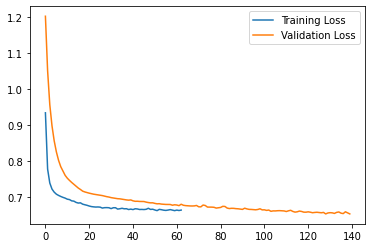

In [ ]:
clf = MLPClassifier(random_state=42, 
                    hidden_layer_sizes=(6, 6), 
                    alpha=0.05, 
                    learning_rate_init=0.003, 
                    batch_size=15, 
                    activation='relu'
                    )
clf.fit(X_train, y_train)
print('Validation Score = ', clf.score(X_val, y_val))
print('Test Score = ', clf.score(X_test, y_test))
test_s.append(clf.score(X_test, y_test))
val_s.append(clf.score(X_val, y_val))
pred = clf.predict(X_test)
f1 = f1_score(pred,y_test)
f1_s.append(f1)
print('f1 Score = ', f1)
plt.plot(clf.loss_curve_, label='Training Loss')
clf.fit(X_val,y_val)
plt.plot(clf.loss_curve_, label = 'Validation Loss')
plt.legend()

In [ ]:
clf = svm.SVC(kernel='rbf',gamma=0.1,C=5,random_state=42)
clf.fit(X_train, y_train)
print('Validation Score = ', clf.score(X_val, y_val))
print('Test Score = ', clf.score(X_test, y_test))
test_s.append(clf.score(X_test, y_test))
val_s.append(clf.score(X_val, y_val))
pred = clf.predict(X_test)
f1 = f1_score(pred,y_test)
f1_s.append(f1)
print('f1 Score = ', f1)

Validation Score =  0.6557377049180327
Test Score =  0.5983606557377049
f1 Score =  0.6956521739130435


In [ ]:
clf=RandomForestClassifier(n_estimators=12,max_depth=5,max_features=5,random_state=1).fit(X_train,y_train)
clf.fit(X_train, y_train)
print('Validation Score = ', clf.score(X_val, y_val))
print('Test Score = ', clf.score(X_test, y_test))
test_s.append(clf.score(X_test, y_test))
val_s.append(clf.score(X_val, y_val))
pred = clf.predict(X_test)
f1 = f1_score(pred,y_test)
f1_s.append(f1)
print('f1 Score = ', f1)

Validation Score =  0.5819672131147541
Test Score =  0.6229508196721312
f1 Score =  0.6891891891891891


In [ ]:
frame=['MLP Classifier','SVM Classifier','Random Forest Classifier']
scores=pd.DataFrame(list(zip(frame,val_s,test_s,f1_s)),
              columns=['ML Framework','Validation Score','Test score', 'F1 Score'])
scores

,ML Framework,Validation Score,Test score,F1 Score
0,MLP Classifier,0.680328,0.606557,0.692308
1,SVM Classifier,0.655738,0.598361,0.695652
2,Random Forest Classifier,0.581967,0.622951,0.689189
